In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy import signal
from matplotlib import axes
import scipy

data_url= r"C:\Users\Tech\Desktop\Chao_Liu_Nanowire\Code_Nanowire\working_electrode_1-current_voltage.txt"
df = pd.read_csv(data_url, delimiter = "\t")
df = df['Current (A)']
df=df.to_numpy()

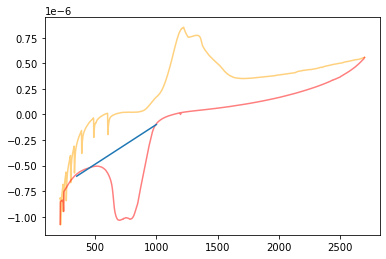

In [108]:
df_0 = df[215:2700]
x_0 = np.arange (215,2700,1)
df_1 = df[2701:5186]
df_1 = df_1[::-1]

#line_0= ax0.plot (filtered_0, color='red')
plt.plot(x_0, df_0,color='orange',alpha=0.5)
plt.plot (x_0, df_1,color='red',alpha=0.5)
plt.plot ([[350],[1000]],[[-6.027116826428988e-7],[-0.0981365320845285e-6]])

plt.show ()

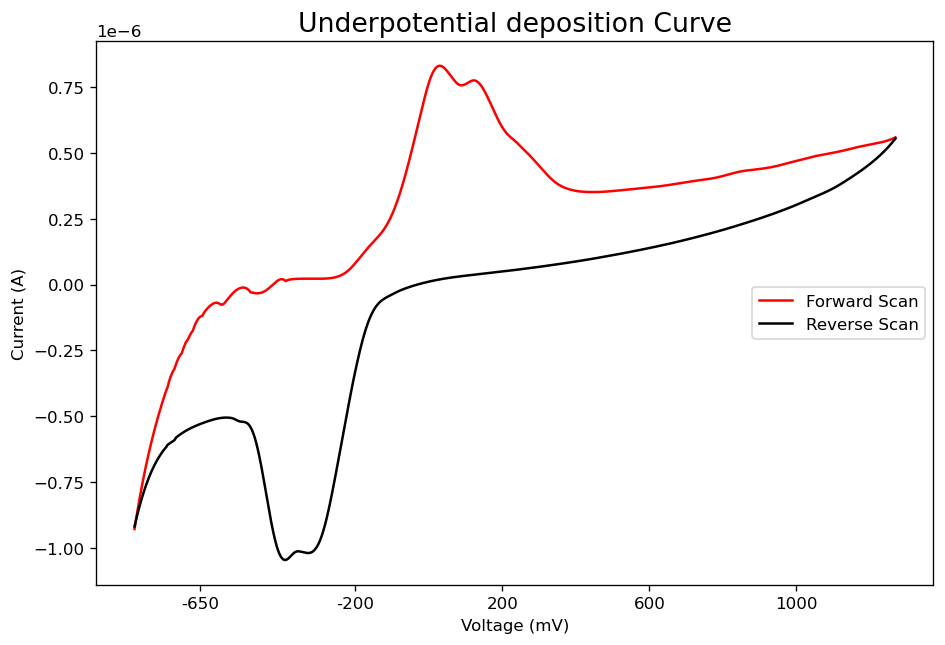

In [87]:
freqs_0, psd_0 = signal.welch(df_0)
freqs_1, psd_1 = signal.welch(df_1)

'''
plt.figure(figsize=(5, 4))
plt.loglog(freqs_0, psd_0/psd_0[0])
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

freqs_1, psd_1 = signal.welch(df_1)

plt.figure(figsize=(5, 4))
plt.loglog(freqs_1, psd_1/psd_1[0])
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
'''

PSD_filtered_0 = signal.savgol_filter(df_0, 211, 4)
PSD_filtered_1 = signal.savgol_filter(df_1, 211, 4)

v_point= ['-650','-200','200','600','1000']
plt.figure (figsize=(9,6),dpi=120)

plt.plot (PSD_filtered_0 , color='red', label='Forward Scan')
plt.plot (PSD_filtered_1 , color='black', label='Reverse Scan')
plt.legend(loc=5)
plt.xticks (x_point, v_point)
plt.title('Underpotential deposition Curve',color='black', size='16')
plt.xlabel ('Voltage (mV)')
plt.ylabel ('Current (A)')

plt.show ()
